In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from src.utils import set_seed

In [9]:
set_seed(42)

Random seed 42 has been set.


In [10]:
X = np.random.normal(0, 1, (10000, 2))

In [11]:
U = np.random.uniform(-1, 1, 10000)

In [17]:
alpha = 1
beta = 1
gamma = 2
Y = np.where(alpha * X[:,0]+ beta * X[:,1] + gamma* U > 0, 1, 0)

In [28]:
beta_h = .5
alpha_h = .5
gamma_h = 2
H = np.where(alpha_h * X[:,0]+ beta_h * X[:,1] + gamma*U> 0, 1, 0)

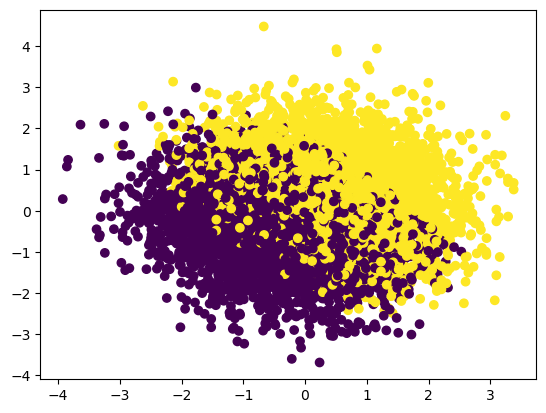

In [26]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [64]:
r_x = alpha * X[:,0]+ beta * X[:,1]
level = 0

In [65]:
np.mean(H[r_x < level] == Y[r_x < level]), np.mean(H[r_x > level] == Y[r_x > level])

(0.8833232749949709, 0.886060847086896)

In [75]:
import pandas as pd
binned = np.digitize(np.abs(r_x), np.linspace(-5, 5, 100))
df = pd.DataFrame({'r_x': r_x, 'H': H, 'Y': Y, 'binned': binned})

In [76]:
df.groupby('binned').apply(lambda x: np.mean(x['H'] == x['Y']))

binned
50     1.000000
51     0.981343
52     0.984429
53     0.967410
54     0.961089
55     0.945283
56     0.930357
57     0.894118
58     0.893246
59     0.878104
60     0.889952
61     0.883777
62     0.849885
63     0.837696
64     0.795252
65     0.807808
66     0.775244
67     0.819549
68     0.743802
69     0.748918
70     0.759259
71     0.759563
72     0.809524
73     0.809211
74     0.843750
75     0.773438
76     0.872093
77     0.811881
78     0.794872
79     0.855072
80     0.943396
81     0.880952
82     0.916667
83     0.870968
84     0.974359
85     1.000000
86     1.000000
87     1.000000
88     1.000000
89     1.000000
90     1.000000
91     1.000000
92     1.000000
93     1.000000
94     1.000000
95     1.000000
96     1.000000
97     1.000000
98     1.000000
100    1.000000
dtype: float64

C:\Users\andre\anaconda3\envs\EmpiricalBenchmarks4SC\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: ylabel='Density'>

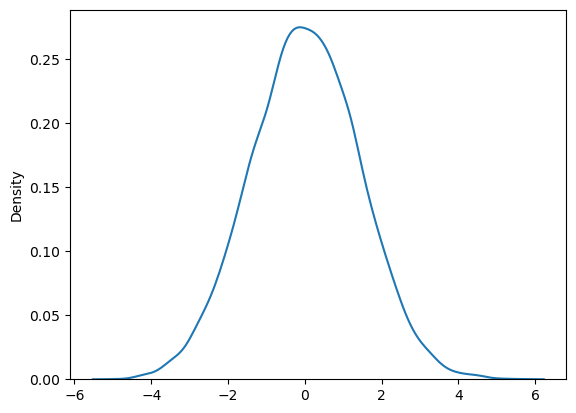

In [74]:

sns.kdeplot(r_x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


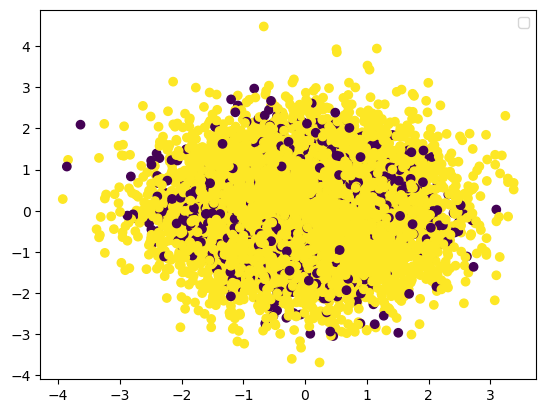

In [41]:
plt.scatter(X[:,0], X[:,1], c=Y==H)
plt.legend()

In [24]:
from lightgbm import LGBMClassifier



LGBMClassifier()